## Import Modules

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, Input
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset Visualization

In [2]:
class_names= os.listdir('../plantVilageDataset/train')
print(class_names)
print("\nNo. of Classes= ", len(class_names))


['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [3]:
train_ds_items=[ len(os.listdir(f"../plantVilageDataset/train/{class_name}/")) for class_name in class_names]
val_ds_items=[ len(os.listdir(f"../plantVilageDataset/valid/{class_name}/")) for class_name in class_names]
print(train_ds_items, len(train_ds_items))
print(val_ds_items, len(val_ds_items))

[2016, 1987, 1760, 2008, 1816, 1826, 1683, 1642, 1907, 1859, 1908, 1888, 1920, 1692, 1722, 2010, 1838, 1728, 1913, 1988, 1939, 1824, 1939, 1781, 2022, 1736, 1824, 1774, 1702, 1920, 1926, 1851, 1882, 1745, 1741, 1827, 1790, 1961] 38
[504, 497, 440, 502, 454, 456, 421, 410, 477, 465, 477, 472, 480, 423, 430, 503, 459, 432, 478, 497, 485, 456, 485, 445, 505, 434, 456, 444, 425, 480, 481, 463, 470, 436, 435, 457, 448, 490] 38


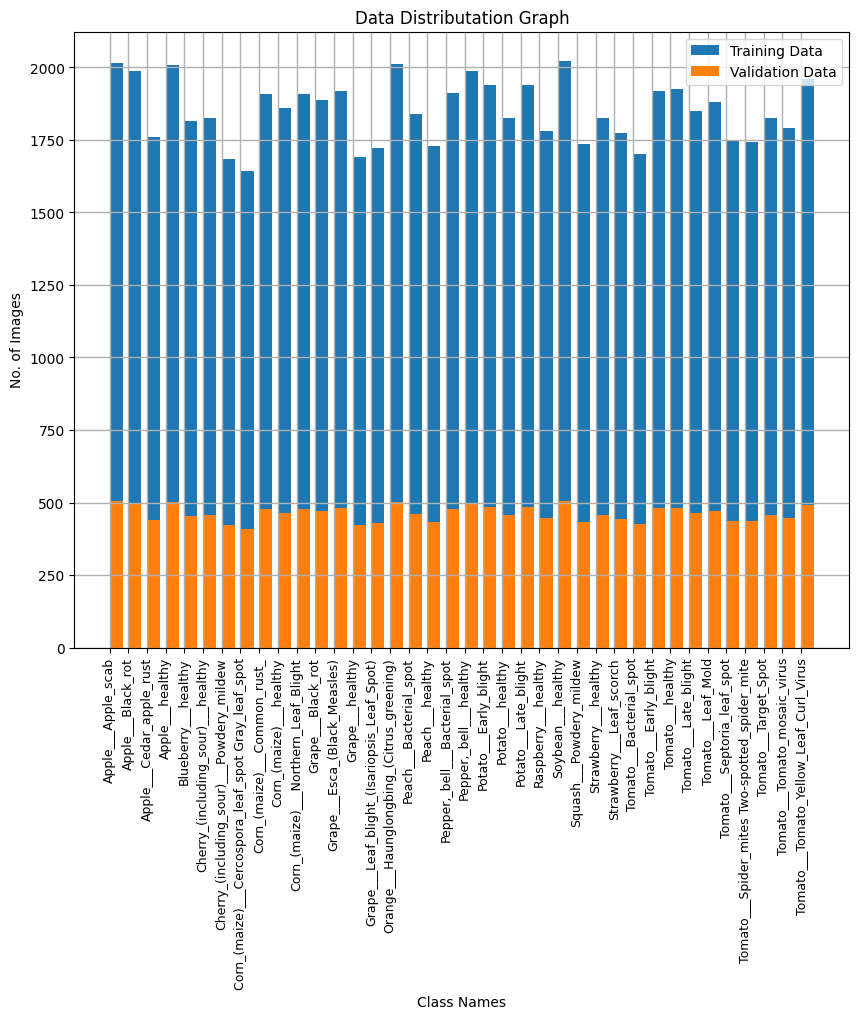

In [4]:
# Plot data distributation over training and validation dataset
x=range(1,39)
plt.figure(figsize=(10,8))
plt.grid(True, linewidth=1, linestyle='-')
plt.bar(class_names,train_ds_items,width=0.7,label="Training Data",align='edge')
plt.bar(class_names,val_ds_items,width=0.7,label="Validation Data",align='edge')
plt.xlabel('Class Names')
plt.ylabel('No. of Images')
plt.xticks(rotation=90, fontsize=9)
plt.legend(loc='upper right')
plt.title("Data Distributation Graph")
plt.show()

## Data Preprocessing

#### Training Image Preprocessing

In [2]:
trainig_set=tf.keras.utils.image_dataset_from_directory(
    "../plantVilageDataset/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)
trainig_set

Found 70295 files belonging to 38 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

#### Validation Image Preprocessing

In [3]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    "../plantVilageDataset/valid/",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


## Build The Model

In [4]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS= 3

In [17]:
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=38
model= models.Sequential([
    # Input(shape=input_shape),
    
    layers.Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=[IMAGE_SIZE,IMAGE_SIZE,CHANNELS]),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(256,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(512,kernel_size=(3,3),padding='same',activation='relu'),
    layers.Conv2D(512,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Dropout(0.25),
    
    layers.Flatten(),
    
    layers.Dense(1500,activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 127, 127, 64)      18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                

## Train The Model

In [20]:
EPOCHS=1
history= model.fit(
    x=trainig_set,
    batch_size=BATCH_SIZE,
    validation_data=validation_set,
    verbose=1,
    epochs=EPOCHS
)



 219/2197 [=>............................] - ETA: 2:11:38 - loss: 2.8331 - accuracy: 0.2267

KeyboardInterrupt: 

## Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

In [ ]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

## Save Model

In [ ]:
model.save('trained_plant_disease_model.keras')

In [ ]:
training_history.history #Return Dictionary of history

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

## Accuracy Visualization

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Other metrics for model evaluation

In [ ]:

test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [ ]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

In [ ]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()